# Counting Space Functions

Experimenting with space functions, we first import the lattice module, which contains the `Lattice` class and functions for lattice generation and manipulation.

We also import the `is_distributive` function from the generation module to test if a given lattice is distributive, and illustrate that the `random_lattice` function generates both distributive and non-distributive lattices.

## Note

The `lattice`, `generation`, `delta`, and `experimental` modules correspond to the lattice.py, generation.py, delta.py and experimental.py files respectively.

In [ ]:
import lattice
from generation import is_distributive

We create our `lattice` list with random lattice of sizes 2 to 8, and make sure that the sixth lattice is non-distributive.

In [8]:
lattices = [lattice.Lattice(lattice.lattice_from_covers(lattice.random_lattice(n, 0.95)))
    for n in range(2,9)]

In [12]:
lattices[5] = lattice.Lattice(lattice.lattice_from_covers([[], [0], [0], [0], [1, 2, 3], [3], [4, 5]]))

In [13]:
for (i, l) in enumerate(lattices):
    result = "non-"
    if is_distributive(l): result = ""
    print("Lattice [{}]({}distributive): {}".format(i, result, lattice.covers_from_lattice(l.lattice)))

Lattice [0](distributive): [[], [0]]
Lattice [1](distributive): [[], [0], [1]]
Lattice [2](distributive): [[], [0], [0], [1, 2]]
Lattice [3](non-distributive): [[], [0], [0], [0], [1, 2, 3]]
Lattice [4](non-distributive): [[], [0], [0], [0], [0], [1, 2, 3, 4]]
Lattice [5](non-distributive): [[], [0], [0], [0], [1, 2, 3], [3], [4, 5]]
Lattice [6](non-distributive): [[], [0], [0], [1, 2], [0], [2], [2, 4], [3, 5, 6]]


Now we create a list with a random selection of 2 space functions for each lattice in `lattices` and use them to calculate $\Delta_I$, since some of the lattices are non-distributives with use `delta_foo` and measure the time needed for each calculation.

In [15]:
import random
space_functions = [random.sample(l.space_functions, 2) for l in lattices]

In [16]:
from time import perf_counter
def delta_times(l, sf):
    start = perf_counter()
    result = lattice.delta_foo(l, sf)
    return (perf_counter() - start, result)
deltas = [delta_times(l, sf) for (l, sf) in zip(lattices, space_functions)]
print("Delta times:", [d[0] for d in deltas])

Delta times: [2.655100070114713e-05, 1.5301000530598685e-05, 1.7318001482635736e-05, 2.417599898763001e-05, 9.213699922838714e-05, 4.063900087203365e-05, 0.0002094550000037998]


Now we can plot the measured times against the lattices' size and other properties using `matplotlib` and `pyplot`.

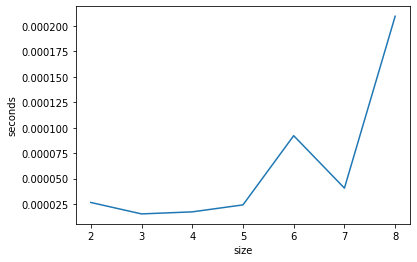

In [18]:
import matplotlib.pyplot as plt
plt.plot([2,3,4,5,6,7,8], [l[0] for l in deltas])
plt.ylabel("seconds")
plt.xlabel("size")
plt.show()

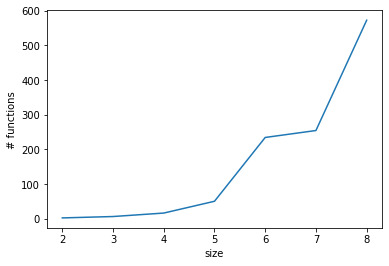

In [20]:

plt.plot([2,3,4,5,6,7,8], [len(l.space_functions) for l in lattices])
plt.ylabel("# functions")
plt.xlabel("size")
plt.show()

Now we replace the results of the sixth lattice, a non-distributive lattice with 8 ndoes, for the ones of a powerset lattice with 8 nodes in total.

When working with powerset lattices and space functions, it's faster to use the `random_space_function` function than calculating all posssible space functions and selecting at random.

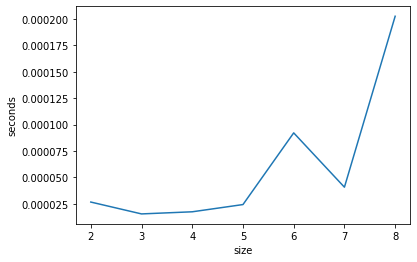

In [30]:
from delta import random_space_function
powerset = lattice.Lattice(lattice.powerset_lattice(3))
sf = [random_space_function(powerset) for _ in range(2)]
plt.plot([2,3,4,5,6,7,8], [d[0] for d in deltas[:-1]] + [delta_times(powerset, sf)[0]])
plt.ylabel("seconds")
plt.xlabel("size")
plt.show()

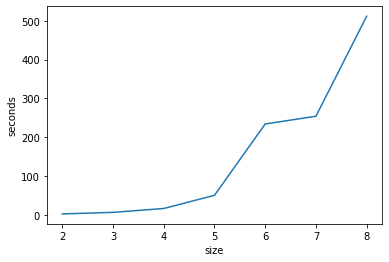

In [31]:
plt.plot([2,3,4,5,6,7,8], [len(d.space_functions) for d in lattices[:-1]] + [512])
plt.ylabel("seconds")
plt.xlabel("size")
plt.show()

In [32]:
delta_times(powerset, sf)

(0.00015238199921441264, [0, 1, 0, 1, 1, 1, 1, 1])

We can also show the corresponding diagram of every lattice created with the `Lattice` class by calling the `diagram` method. `graphviz` implements the methods necesary to show the diagram as an svg readable by Jupyter.

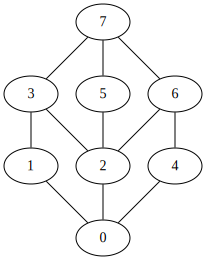

In [35]:
lattices[6].diagram()

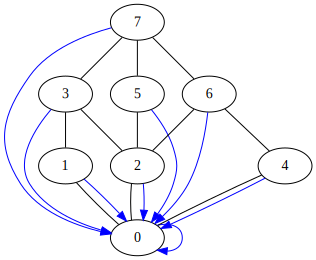

In [37]:
lattices[6].diagram(lattice.delta_foo(lattices[6], space_functions[6]))

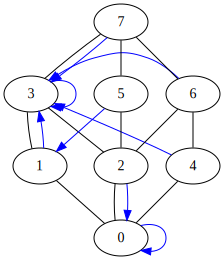

In [39]:
lattices[6].diagram(space_functions[6][0])

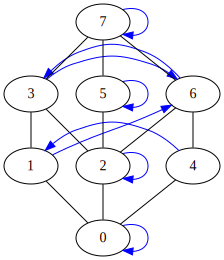

In [40]:
lattices[6].diagram(space_functions[6][1])

## Summary

Again, we create a random lattice, show its diagram and count the number of valid space functions.

In [50]:
l = lattice.random_lattice(8, 0.95)

In [54]:
l = lattice.Lattice(lattice.lattice_from_covers(lattice.random_lattice(8, 0.95)))

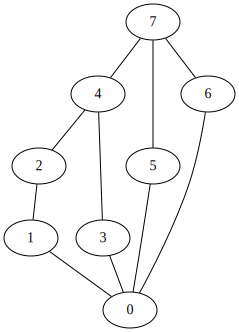

In [55]:
l.diagram()

In [56]:
is_distributive(l)

False

In [57]:
len(l.space_functions)

808

In [58]:
len(l)

8

## Counting Space Functions

Finding the maximum and minimum number of space functions from a sample of random lattices of size 8, which allows us to compare it to the known number of space functions of a powerset lattice with 8 nodes (512), the linear lattice of 8 nodes (3432), and the non-distributive lattice of 8 nodes $M_6$ (13376).

In [59]:
rlattice = [lattice.Lattice(lattice.lattice_from_covers(lattice.random_lattice(8, 0.95))) for _ in range(20)]

In [60]:
max([len(l.space_functions) for l in rlattice])

13376

In [62]:
min([len(l.space_functions) for l in rlattice])

554

In [64]:
for (i, l) in enumerate(rlattice):
    result = "non-"
    if is_distributive(l): result = ""
    print("Lattice[{}]({}distributive): {}".format(i, result, len(l.space_functions)))

Lattice[0](non-distributive): 600
Lattice[1](non-distributive): 688
Lattice[2](non-distributive): 600
Lattice[3](non-distributive): 1168
Lattice[4](non-distributive): 1868
Lattice[5](non-distributive): 556
Lattice[6](non-distributive): 1168
Lattice[7](non-distributive): 3236
Lattice[8](non-distributive): 694
Lattice[9](non-distributive): 594
Lattice[10](non-distributive): 13376
Lattice[11](non-distributive): 730
Lattice[12](non-distributive): 850
Lattice[13](non-distributive): 556
Lattice[14](non-distributive): 688
Lattice[15](non-distributive): 554
Lattice[16](non-distributive): 600
Lattice[17](non-distributive): 808
Lattice[18](non-distributive): 1048
Lattice[19](non-distributive): 848


## Parallel Generation

Since generating all the space functions for lattices with $n\geq 8$ can take some time. We can use the experimental `NxLattice` class (equivalent to the `Lattice` class) to compute this information in parallel. Also we can present the current progress for the task using the `progress_bar` function.

In [65]:
from generation import progress_bar
from experimental import NxLattice
plattice = [NxLattice(lattice.lattice_from_covers(lattice.random_lattice(8, 0.95)), True) for _ in range(100)]

In [66]:
for (i, l) in enumerate(plattice):
    progress_bar(i, len(plattice), 50)
    l.space_functions
min([len(l.space_functions) for l in plattice])

Progress: [================================================= ] 99/100

524

In [69]:
plattice = [NxLattice(lattice.lattice_from_covers(lattice.random_lattice(8, 0.95)), True) for _ in range(2000)]
for (i, l) in enumerate(plattice):
    progress_bar(i, len(plattice), 50)
    l.space_functions
min([len(l.space_functions) for l in plattice])

Progress: [================================================= ] 1999/2000

512

In [70]:
max(len(l.space_functions) for l in plattice)

13376

In [71]:
presults = [delta_times(l, random.sample(l.space_functions, 3)) for l in plattice]
max(l[0] for l in presults)

0.0022105430252850056

In [72]:
min(l[0] for l in presults)

4.7874986194074154e-05

In [73]:
sum(l[0] for l in presults)/len(presults)

0.0001526543096115347